In [153]:
import pandas as pd
import numpy as np

from datetime import datetime

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## First Option

In [162]:
icfes = pd.read_csv("Bogota_historico_saber_11_20240225.csv")
print(icfes.shape)
icfes.head(3)

(1131725, 51)


,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NACIONALIDAD,ESTU_PAIS_RESIDE,ESTU_PRIVADO_LIBERTAD,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20224,TI,SB11202240114259,URBANO,N,A,ACADÉMICO,3.111020e+11,311102001287,11,11001,73395.0,BOGOTÁ,MIXTO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMNASIO LOS SAUCES,GIMNASIO LOS SAUCES,S,11.0,11001.0,11.0,11001.0,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,06/05/2006,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Técnica o tecnológica incompleta,Estrato 2,3 a 4,Si,Si,Si,Si,A2,59.0,58.0,57.0,62.0,62.0,298.0
1,20224,TI,SB11202240033228,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001032280,11,11001,665398.0,BOGOTÁ,MIXTO,UNICA,BOGOTÁ D.C.,OFICIAL,COLEGIO TECNICO TOMAS RUEDA VARGAS (IED),COL DIST TOMAS RUEDA VARGAS,S,11.0,11001.0,11.0,11001.0,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,14/02/2005,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) completa,Ninguno,Estrato 2,3 a 4,Si,Si,Si,Si,A-,44.0,39.0,40.0,46.0,43.0,211.0
2,20224,TI,SB11202240615723,URBANO,N,A,ACADÉMICO,1.110010e+11,111001014176,11,11001,21030.0,BOGOTÁ,MIXTO,NOCHE,BOGOTÁ D.C.,OFICIAL,COLEGIO SAN CRISTOBAL SUR (IED),CENT EDUC DIST SAN CRISTOBAL SUR,S,11.0,11001.0,11.0,11001.0,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,10/02/2006,M,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Tres,NaN,NaN,NaN,3 a 4,No,Si,NaN,Si,A1,56.0,61.0,59.0,44.0,67.0,288.0


In [163]:
_icfes = icfes.copy()

In [368]:
icfes = _icfes.copy()

In [369]:
icfes = icfes[icfes['PERIODO'] == 20224].reset_index(drop=True)

fecha_de_corte = datetime(2022, 10, 1)
icfes["ESTU_EDAD"] = (fecha_de_corte - pd.to_datetime(
    icfes.ESTU_FECHANACIMIENTO, format="%d/%m/%Y")).dt.days // 365
icfes = icfes[(icfes.ESTU_EDAD < 25) & (icfes.ESTU_EDAD > 10)].reset_index(drop=True)

icfes['COLE_COD_DANE_ESTABLECIMIENTO'] = \
    icfes['COLE_COD_DANE_ESTABLECIMIENTO'].astype(int).astype(str)

icfes = icfes.drop_duplicates(['ESTU_CONSECUTIVO'], keep='first').reset_index(drop=True)

icfes = icfes[icfes['COLE_CARACTER'] != 'NO APLICA'].reset_index(drop=True)

icfes = icfes[
    (icfes['ESTU_DEPTO_PRESENTACION'] == 'BOGOTÁ') &
    (icfes['ESTU_DEPTO_RESIDE'] == 'BOGOTÁ')].reset_index(drop=True)

icfes = icfes[icfes['ESTU_NACIONALIDAD'] == 'COLOMBIA'].reset_index(drop=True)

icfes = icfes[icfes['ESTU_PRIVADO_LIBERTAD'] == "N"].reset_index(drop=True)

icfes = icfes[icfes['ESTU_ESTADOINVESTIGACION'] == 'PUBLICAR'].reset_index(drop=True)

icfes = icfes[
    (~icfes['FAMI_CUARTOSHOGAR'].isnull())
].reset_index(drop=True)

icfes = icfes[
    (~icfes['FAMI_PERSONASHOGAR'].isnull())
].reset_index(drop=True)

icfes = icfes[
    (~icfes['PUNT_INGLES'].isnull())
].reset_index(drop=True)

icfes = icfes[
    (~icfes['FAMI_ESTRATOVIVIENDA'].isnull()) & (icfes['FAMI_ESTRATOVIVIENDA'] != "Sin Estrato")]

icfes.head(2)

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_CODIGO_ICFES,COLE_DEPTO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_NATURALEZA,COLE_NOMBRE_ESTABLECIMIENTO,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,ESTU_COD_DEPTO_PRESENTACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_DEPTO_PRESENTACION,ESTU_DEPTO_RESIDE,ESTU_ESTADOINVESTIGACION,ESTU_ESTUDIANTE,ESTU_FECHANACIMIENTO,ESTU_GENERO,ESTU_MCPIO_PRESENTACION,ESTU_MCPIO_RESIDE,ESTU_NACIONALIDAD,ESTU_PAIS_RESIDE,ESTU_PRIVADO_LIBERTAD,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL,ESTU_EDAD
0,20224,TI,SB11202240114259,URBANO,N,A,ACADÉMICO,311102001287,311102001287,11,11001,73395.0,BOGOTÁ,MIXTO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMNASIO LOS SAUCES,GIMNASIO LOS SAUCES,S,11.0,11001.0,11.0,11001.0,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,06/05/2006,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Técnica o tecnológica incompleta,Estrato 2,3 a 4,Si,Si,Si,Si,A2,59.0,58.0,57.0,62.0,62.0,298.0,16
1,20224,TI,SB11202240033228,URBANO,N,A,TÉCNICO/ACADÉMICO,111001032280,111001032280,11,11001,665398.0,BOGOTÁ,MIXTO,UNICA,BOGOTÁ D.C.,OFICIAL,COLEGIO TECNICO TOMAS RUEDA VARGAS (IED),COL DIST TOMAS RUEDA VARGAS,S,11.0,11001.0,11.0,11001.0,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,14/02/2005,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) completa,Ninguno,Estrato 2,3 a 4,Si,Si,Si,Si,A-,44.0,39.0,40.0,46.0,43.0,211.0,17


In [370]:
drop_columns = [
    "ESTU_TIPODOCUMENTO", "COLE_COD_MCPIO_UBICACION", "COLE_COD_DEPTO_UBICACION", "COLE_CODIGO_ICFES",
    "COLE_DEPTO_UBICACION", "COLE_MCPIO_UBICACION", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_NOMBRE_SEDE",
    "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "ESTU_COD_DEPTO_PRESENTACION",
    "ESTU_COD_MCPIO_PRESENTACION", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO",
    "ESTU_DEPTO_PRESENTACION", "ESTU_DEPTO_RESIDE", "ESTU_ESTADOINVESTIGACION", "ESTU_ESTUDIANTE",
    "ESTU_FECHANACIMIENTO", "ESTU_MCPIO_PRESENTACION", "ESTU_MCPIO_RESIDE", "ESTU_NACIONALIDAD",
    "ESTU_PAIS_RESIDE", "ESTU_PRIVADO_LIBERTAD", "COLE_CALENDARIO", "COLE_CARACTER", "PERIODO",
    "ESTU_CONSECUTIVO", "DESEMP_INGLES", "PUNT_INGLES", "PUNT_MATEMATICAS", "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA"
]

icfes = icfes.drop(columns=drop_columns)
print(icfes.shape)
icfes.head(3)

(67257, 18)


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,ESTU_EDAD
0,URBANO,N,MIXTO,COMPLETA,NO OFICIAL,S,F,Dos,Postgrado,Técnica o tecnológica incompleta,Estrato 2,3 a 4,Si,Si,Si,Si,298.0,16
1,URBANO,N,MIXTO,UNICA,OFICIAL,S,F,Dos,Secundaria (Bachillerato) completa,Ninguno,Estrato 2,3 a 4,Si,Si,Si,Si,211.0,17
3,URBANO,N,MIXTO,UNICA,OFICIAL,S,F,Tres,Técnica o tecnológica incompleta,No sabe,Estrato 2,5 a 6,No,No,Si,No,203.0,18


In [371]:
icfes['FAMI_CUARTOSHOGAR'] = icfes['FAMI_CUARTOSHOGAR'].replace({
    "Uno": 1, "Dos": 2, "Tres": 3, "Cuatro": 4, "Cinco": 5, "Seis": 6,
    "Seis o mas": 6, "Siete": 7, "Ocho": 8, "Nueve": 9, "Diez o más": 10})

icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].replace({
    "Secundaria (Bachillerato) completa": "Secundaria",
    "Secundaria (Bachillerato) incompleta": "Secundaria",
    "Educación profesional completa": "Educación profesional",
    "Educación profesional incompleta": "Educación profesional",
    "Primaria incompleta": "Primaria",
    "Primaria completa": "Primaria",
    "Técnica o tecnológica completa": "Técnica o tecnológica",
    "Técnica o tecnológica incompleta": "Técnica o tecnológica",
    "Postgrado": "Postgrado",
    "No sabe": "S/I",
    "No Aplica": "Ninguno",
    "Ninguno": "Ninguno"
})

icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].replace({
    "Secundaria (Bachillerato) completa": "Secundaria",
    "Secundaria (Bachillerato) incompleta": "Secundaria",
    "Educación profesional completa": "Educación profesional",
    "Educación profesional incompleta": "Educación profesional",
    "Primaria incompleta": "Primaria",
    "Primaria completa": "Primaria",
    "Técnica o tecnológica completa": "Técnica o tecnológica",
    "Técnica o tecnológica incompleta": "Técnica o tecnológica",
    "Postgrado": "Postgrado",
    "No sabe": "S/I",
    "No Aplica": "Ninguno",
    "Ninguno": "Ninguno"
})

icfes['FAMI_PERSONASHOGAR'] = icfes['FAMI_PERSONASHOGAR'].replace({
    "1 a 2": 2, "3 a 4": 4, "5 a 6": 6, "7 a 8": 8, "9 o más": 9})

icfes['COLE_BILINGUE'].fillna(-1, inplace=True)
icfes['FAMI_EDUCACIONMADRE'].fillna("S/I", inplace=True)
icfes['FAMI_EDUCACIONPADRE'].fillna("S/I", inplace=True)
icfes['FAMI_TIENEAUTOMOVIL'].fillna("S/I", inplace=True)
icfes['FAMI_TIENECOMPUTADOR'].fillna("S/I", inplace=True)
icfes['FAMI_TIENEINTERNET'].fillna("S/I", inplace=True)
icfes['FAMI_TIENELAVADORA'].fillna("S/I", inplace=True)

icfes['COLE_BILINGUE'].replace({
    "N": 0, "S": 1}, inplace=True)

icfes['COLE_SEDE_PRINCIPAL'].replace({
    "N": 0, "S": 1}, inplace=True)

# icfes['DESEMP_INGLES'].replace({
#     "A1": 1, "A2": 2, "A-": 1, "B1": 3, "B+": 4, "B2": 4}, inplace=True)

icfes.head(2)

/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_35127/2859294142.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  icfes['FAMI_CUARTOSHOGAR'] = icfes['FAMI_CUARTOSHOGAR'].replace({
/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_35127/2859294142.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  icfes['FAMI_PERSONASHOGAR'] = icfes['FAMI_PERSONASHOGAR'].replace({
/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_35127/2859294142.py:38: FutureWarning: A value is trying to be set on a copy of a Data

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,ESTU_EDAD
0,URBANO,0,MIXTO,COMPLETA,NO OFICIAL,1,F,2,Postgrado,Técnica o tecnológica,Estrato 2,4,Si,Si,Si,Si,298.0,16
1,URBANO,0,MIXTO,UNICA,OFICIAL,1,F,2,Secundaria,Ninguno,Estrato 2,4,Si,Si,Si,Si,211.0,17


<Axes: >

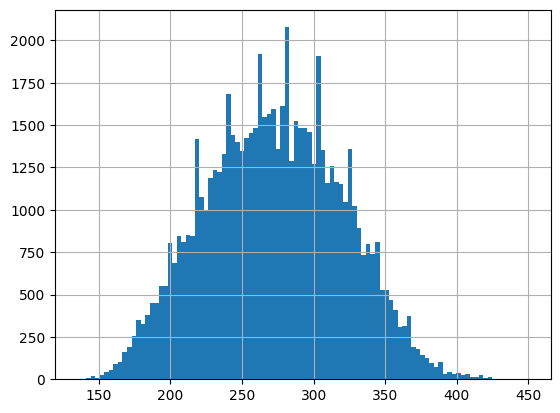

In [372]:
icfes['PUNT_GLOBAL'].hist(bins=100)

In [373]:
icfes['PUNT_GLOBAL_CAT'] = np.where(
    icfes['PUNT_GLOBAL'] < 250,
    "Bajo", np.where(icfes['PUNT_GLOBAL'] > 360, "Alto", "Medio"))

In [375]:
print(icfes.shape)
icfes.head(3)

(67257, 19)


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,ESTU_EDAD,PUNT_GLOBAL_CAT
0,URBANO,0,MIXTO,COMPLETA,NO OFICIAL,1,F,2,Postgrado,Técnica o tecnológica,Estrato 2,4,Si,Si,Si,Si,298.0,16,Medio
1,URBANO,0,MIXTO,UNICA,OFICIAL,1,F,2,Secundaria,Ninguno,Estrato 2,4,Si,Si,Si,Si,211.0,17,Bajo
3,URBANO,0,MIXTO,UNICA,OFICIAL,1,F,3,Técnica o tecnológica,S/I,Estrato 2,6,No,No,Si,No,203.0,18,Bajo


In [376]:
icfes.isnull().sum()

COLE_AREA_UBICACION     0
COLE_BILINGUE           0
COLE_GENERO             0
COLE_JORNADA            0
COLE_NATURALEZA         0
COLE_SEDE_PRINCIPAL     0
ESTU_GENERO             0
FAMI_CUARTOSHOGAR       0
FAMI_EDUCACIONMADRE     0
FAMI_EDUCACIONPADRE     0
FAMI_ESTRATOVIVIENDA    0
FAMI_PERSONASHOGAR      0
FAMI_TIENEAUTOMOVIL     0
FAMI_TIENECOMPUTADOR    0
FAMI_TIENEINTERNET      0
FAMI_TIENELAVADORA      0
PUNT_GLOBAL             0
ESTU_EDAD               0
PUNT_GLOBAL_CAT         0
dtype: int64

In [377]:
icfes['PUNT_GLOBAL_CAT'].value_counts()

PUNT_GLOBAL_CAT
Medio    43078
Bajo     22215
Alto      1964
Name: count, dtype: int64

In [382]:
icfes.head(1)

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,ESTU_EDAD,PUNT_GLOBAL_CAT
0,URBANO,0,MIXTO,COMPLETA,NO OFICIAL,1,0,2,Postgrado,Técnica o tecnológica,Estrato 2,4,Si,Si,Si,Si,298.0,16,Medio


In [389]:
icfes['FAMI_ESTRATOVIVIENDA'].value_counts()

FAMI_ESTRATOVIVIENDA
2    29371
3    24553
1     6728
4     5226
5     1037
6      342
Name: count, dtype: int64

In [388]:
icfes['ESTU_GENERO'].replace(
    {"F": 0, "M": 1}, inplace=True)

icfes['COLE_AREA_UBICACION'].replace(
    {"RURAL": 0, "URBANO": 1}, inplace=True)

icfes['FAMI_ESTRATOVIVIENDA'].replace({
    "Estrato 1": 1, "Estrato 2": 2, "Estrato 3": 3, "Estrato 4": 4, "Estrato 5": 5, "Estrato 6": 6}, inplace=True)


/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_35127/2806037785.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  icfes['FAMI_ESTRATOVIVIENDA'].replace({


In [394]:
icfes.head(1)

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,ESTU_EDAD,PUNT_GLOBAL_CAT
0,1,0,MIXTO,COMPLETA,NO OFICIAL,1,0,2,Postgrado,Técnica o tecnológica,2,4,Si,Si,Si,Si,298.0,16,Medio


In [395]:
icfes['FAMI_EDUCACIONMADRE_POST'] = np.where(icfes['FAMI_EDUCACIONMADRE'] == "Postgrado", 1, 0)
icfes['FAMI_EDUCACIONPADRE_POST'] = np.where(icfes['FAMI_EDUCACIONPADRE'] == "Postgrado", 1, 0)

In [392]:
" + ".join([i for i in icfes.columns])

'COLE_AREA_UBICACION + COLE_BILINGUE + COLE_GENERO + COLE_JORNADA + COLE_NATURALEZA + COLE_SEDE_PRINCIPAL + ESTU_GENERO + FAMI_CUARTOSHOGAR + FAMI_EDUCACIONMADRE + FAMI_EDUCACIONPADRE + FAMI_ESTRATOVIVIENDA + FAMI_PERSONASHOGAR + FAMI_TIENEAUTOMOVIL + FAMI_TIENECOMPUTADOR + FAMI_TIENEINTERNET + FAMI_TIENELAVADORA + PUNT_GLOBAL + ESTU_EDAD + PUNT_GLOBAL_CAT'

In [402]:
icfes = icfes[icfes['FAMI_TIENECOMPUTADOR'] != 'S/I'].reset_index(drop=True)
icfes = icfes[icfes['FAMI_TIENEINTERNET'] != 'S/I'].reset_index(drop=True)

print(icfes.shape)
icfes.head(1)

(67101, 21)


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_GENERO,COLE_JORNADA,COLE_NATURALEZA,COLE_SEDE_PRINCIPAL,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,PUNT_GLOBAL,ESTU_EDAD,PUNT_GLOBAL_CAT,FAMI_EDUCACIONMADRE_POST,FAMI_EDUCACIONPADRE_POST
0,1,0,MIXTO,COMPLETA,NO OFICIAL,1,0,2,Postgrado,Técnica o tecnológica,2,4,Si,Si,Si,Si,298.0,16,Medio,1,0


In [404]:
icfes['PUNT_GLOBAL_CAT_BIN'] = np.where(icfes['PUNT_GLOBAL'] > 250, 1, 0)

In [405]:
icfes.to_csv("clean_dataset_icfes_bogota_2024.csv", index=False)

### Second option

In [410]:
student_performance = pd.read_csv("student_performance.csv")

print(student_performance.shape)
student_performance.head(1)

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0


In [411]:
student_performance.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [407]:
student_performance.columns = [i.lower().replace(" ", "_") for i in student_performance.columns]

In [412]:
cols_mapping = {
    "Hours Studied": "horas_estudiadas",
    "Previous Scores": "puntaje_previo",
    "Extracurricular Activities": "actividades_extracurrilares",
    "Sleep Hours": "horas_sueño",
    "Sample Question Papers Practiced": "preguntas_practicadas",
    "Performance Index": "indice_de_rendimiento"
}

student_performance.rename(columns=cols_mapping, inplace=True)

In [413]:
student_performance['actividades_extracurrilares'].replace(
    {"Yes": 1, "No": 0}, inplace=True)

/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_35127/4085521125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_performance['actividades_extracurrilares'].replace(
/var/folders/5n/bzy5ks2d7m17gxrddmh22r900000gn/T/ipykernel_35127/4085521125.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [414]:
student_performance.head(2)

,horas_estudiadas,puntaje_previo,actividades_extracurrilares,horas_sueño,preguntas_practicadas,indice_de_rendimiento
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


In [418]:
student_performance['indice_de_rendimiento_cat_bin'] = np.where(student_performance['indice_de_rendimiento'] > 50, 1, 0)

In [419]:
student_performance.to_csv("clean_student_performance.csv", index=False)